In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [4]:
import pandas as pd
import sklearn.metrics

In [5]:
raw_dataset = pd.read_csv('path_to_LiuCohort_VanAllenCohort_combined_file')
dataset_orig = raw_dataset.copy()
dataset_orig.head()

,Unnamed: 0,patientId,BOR,progression_free,progression,HLA_A,HLA_B,HLA_C,HLA_DRA,HLA_DRB1,...,TAP2,B2M,CIITA,HLA_E,HLA_G,HLA_F,HLA_DRB6,HLA_DQA2,HLA_DQB2,cluster
0,Patient62,Patient62,PR,1001,0,1.668657,1.586356,1.512451,1.773518,1.643296,...,0.831103,1.909646,1.088978,1.235576,0.946713,0.926074,0.792250,1.248603,0.729562,2
1,Patient34,Patient34,PR,240,1,1.382349,1.267528,1.349885,1.323476,1.182995,...,0.473233,1.613738,0.906189,1.131138,0.376680,0.727232,0.678594,0.883093,0.423801,3
2,Patient168,Patient168,PR,580,0,1.427403,1.207075,1.177618,1.121577,0.976016,...,0.668408,1.693897,0.432185,0.923858,0.542761,0.696226,0.384245,0.762835,0.163321,3
3,Patient148,Patient148,PR,792,0,1.604732,1.272908,1.242376,1.591742,1.311325,...,0.414568,1.809064,0.631507,1.002850,0.881968,0.690134,0.562841,0.969250,0.397677,1
4,Patient144,Patient144,PR,662,0,1.359788,1.156066,1.061530,1.295641,1.083108,...,0.634256,1.803402,0.493617,0.893434,0.343252,0.697840,0.511694,0.892619,0.140765,3


In [6]:
dataset=dataset_orig[['cluster','PSME1','PSMB10','TAP2','B2M','CIITA','HLA_A','HLA_B','HLA_C','HLA_E','HLA_G','HLA_F','HLA_DRB6','HLA_DQA2','HLA_DQB2',
                     "HLA_DRA", "HLA_DRB1","HLA_DQA1","HLA_DQB1","HLA_DPA1","HLA_DPB1","HLA_DMA",'HLA_DMB',"HLA_DOA",'HLA_DOB']]
dataset

,cluster,PSME1,PSMB10,TAP2,B2M,CIITA,HLA_A,HLA_B,HLA_C,HLA_E,...,HLA_DRA,HLA_DRB1,HLA_DQA1,HLA_DQB1,HLA_DPA1,HLA_DPB1,HLA_DMA,HLA_DMB,HLA_DOA,HLA_DOB
0,2,1.227676,0.993483,0.831103,1.909646,1.088978,1.668657,1.586356,1.512451,1.235576,...,1.773518,1.643296,1.650303,1.235479,1.457859,1.302001,1.140201,0.890982,0.348543,0.355469
1,3,1.163067,0.769590,0.473233,1.613738,0.906189,1.382349,1.267528,1.349885,1.131138,...,1.323476,1.182995,0.869194,0.503590,1.168863,0.939034,0.935988,0.600156,0.147047,0.177747
2,3,1.096085,0.851706,0.668408,1.693897,0.432185,1.427403,1.207075,1.177618,0.923858,...,1.121577,0.976016,0.983687,0.617396,0.883144,0.665411,0.768777,0.337924,0.060304,0.020181
3,1,1.115555,0.753794,0.414568,1.809064,0.631507,1.604732,1.272908,1.242376,1.002850,...,1.591742,1.311325,1.398540,0.854606,1.280546,1.104343,1.082878,0.852714,0.132658,0.020144
4,3,1.039570,0.564709,0.634256,1.803402,0.493617,1.359788,1.156066,1.061530,0.893434,...,1.295641,1.083108,0.884082,0.468293,0.975513,0.854836,1.005311,0.700336,0.065391,0.146620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2,1.104626,0.963599,0.934148,1.745350,1.032540,1.520970,1.497582,1.317874,1.242791,...,1.568531,1.258538,0.920915,0.431336,1.400489,1.239630,1.155071,0.891684,0.364163,0.443876
158,2,1.111102,0.952075,0.981050,1.730314,1.208388,1.521059,1.580349,1.276413,1.282522,...,1.489052,1.530630,1.494260,1.385760,1.411382,1.221448,1.161245,0.921500,0.394578,0.602423
159,3,1.018357,0.732209,0.712149,1.498615,0.631984,1.259749,1.178908,1.177394,1.015075,...,1.139795,1.084509,1.101882,0.862549,1.004500,0.858374,0.817188,0.596113,0.204150,0.198077
160,3,1.123368,0.629733,0.776433,1.531528,0.580207,1.044513,1.241131,1.145230,1.013546,...,1.151150,1.107104,0.973141,0.831679,0.918775,0.739682,0.856638,0.552925,0.148220,0.241140


In [7]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.isna().sum()
dataset = dataset.dropna()
dataset.shape
dataset['cluster']=dataset['cluster'].astype('uint8')
dataset.shape
dataset.cluster.unique()

/Users/katana/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


array([2, 3, 1, 4], dtype=uint8)

In [8]:
# random sampling from each class since some classes may have low number of cases
frac=0.9
random_state=1

c1=dataset[dataset['cluster']==1]
c1_train_set = c1.sample(frac=frac, random_state=random_state)
c1_test_set = c1.drop(c1_train_set.index)

c2=dataset[dataset['cluster']==2]
c2_train_set = c2.sample(frac=frac, random_state=random_state)
c2_test_set = c2.drop(c2_train_set.index)

c3=dataset[dataset['cluster']==3]
c3_train_set = c3.sample(frac=frac, random_state=random_state)
c3_test_set = c3.drop(c3_train_set.index)

c4=dataset[dataset['cluster']==4]
c4_train_set = c4.sample(frac=frac, random_state=random_state)
c4_test_set = c4.drop(c4_train_set.index)

train_frames=[c1_train_set,c2_train_set,c3_train_set,c4_train_set]
train_set=pd.concat(train_frames)
test_frames=[c1_test_set,c2_test_set,c3_test_set,c4_test_set]
test_set=pd.concat(test_frames)

In [9]:
train_features = train_set.copy()
test_features = test_set.copy()

train_labels = train_features.pop('cluster')
test_labels = test_features.pop('cluster')

In [10]:
X_train=pd.DataFrame.to_numpy(train_features)
y_train=pd.Series.to_numpy(train_labels)

X_test=pd.DataFrame.to_numpy(test_features)
y_test=pd.Series.to_numpy(test_labels)

In [11]:
X=np.concatenate((X_train,X_test),axis=0)
y=np.concatenate((y_train,y_test),axis=0)

In [12]:
clf = LogisticRegression(solver="newton-cg", random_state=0, max_iter=200,C=1.0)
clf.fit(X_train, y_train)
y_score=clf.fit(X_train, y_train).predict_proba(X_test)
clf.fit(X_train, y_train).score(X_test, y_test)

0.875

In [13]:
# Compute ROC curve and ROC area for each class
y_train_bin = label_binarize(y_train, classes=[1,2,3,4])
y_test_bin = label_binarize(y_test, classes=[1,2,3,4])
n_classes = y_train_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])



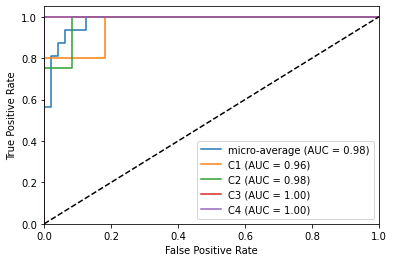

In [14]:
# Plot of a ROC curve for a specific class
#plt.figure()
#plt.plot(fpr[4], tpr[4], label='ROC curve (area = %0.2f)' % roc_auc[4])
#plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
#plt.legend(loc="lower right")
#plt.show()

# Plot ROC curve: multiclass
fig=plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='C{0} (AUC = {1:0.2f})'
                                   ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

#fig.savefig('multiclass_classification.png')

In [15]:
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

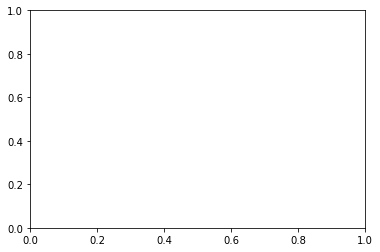

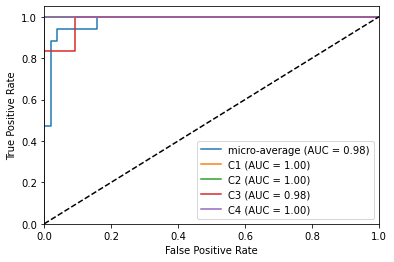

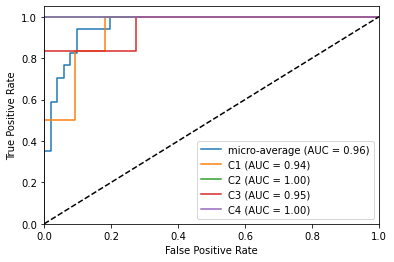

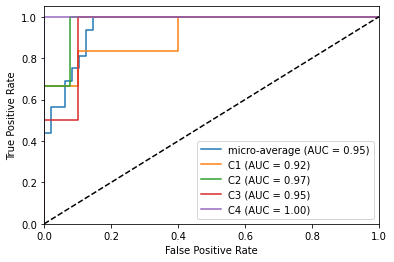

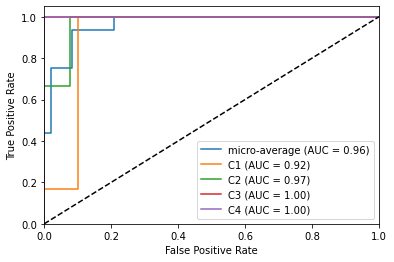

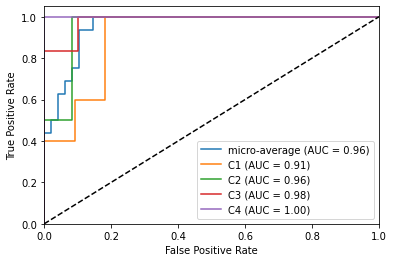

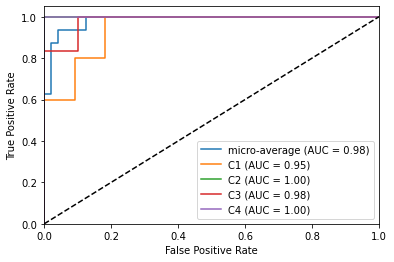

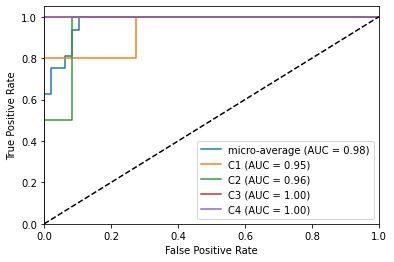

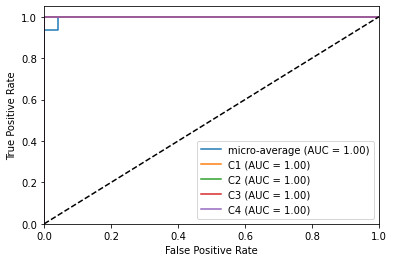

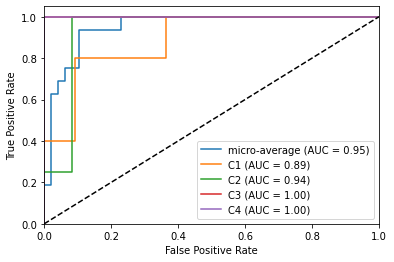

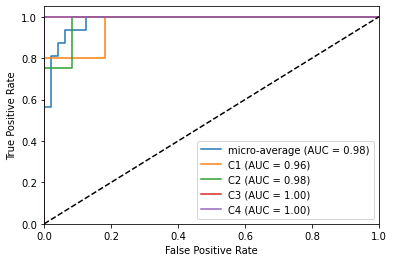

In [16]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = LogisticRegression(solver="newton-cg", random_state=0, max_iter=200,C=1.0)

fprs = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    clf = LogisticRegression(solver="newton-cg", random_state=0, max_iter=200,C=1.0)
    y_score=clf.fit(X[train], y[train]).predict_proba(X[test])
    y_train_bin = label_binarize(y[train], classes=[1,2,3,4])
    y_test_bin = label_binarize(y[test], classes=[1,2,3,4])
    n_classes = y_train_bin.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Plot ROC curve: multiclass
    fig=plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='C{0} (AUC = {1:0.2f})'
                                       ''.format(i+1, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

    tprs.append(tpr)
    aucs.append(roc_auc)
    fprs.append(fpr)


In [17]:
sum_microAUC=0
for i in range(10):
    sum_microAUC += aucs[i]['micro']
print('mean micro AUC =',sum_microAUC/10)

mean micro AUC = 0.9703043901384083


In [18]:
raw_dataset2 = pd.read_csv('path_to_riazCohort_transcriptome_data')


dataset_orig2 = raw_dataset2.copy()
dataset2=dataset_orig2[['PSME1','PSMB10','TAP2','B2M','CIITA','HLA_A','HLA_B','HLA_C','HLA_E','HLA_G','HLA_F','HLA_DRB6','HLA_DQA2','HLA_DQB2',
                     "HLA_DRA", "HLA_DRB1","HLA_DQA1","HLA_DQB1","HLA_DPA1","HLA_DPB1","HLA_DMA",'HLA_DMB',"HLA_DOA",'HLA_DOB']]

dataset2.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset2.isna().sum()
dataset2 = dataset2.dropna()

dataset2.head()

/Users/katana/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,PSME1,PSMB10,TAP2,B2M,CIITA,HLA_A,HLA_B,HLA_C,HLA_E,HLA_G,...,HLA_DRA,HLA_DRB1,HLA_DQA1,HLA_DQB1,HLA_DPA1,HLA_DPB1,HLA_DMA,HLA_DMB,HLA_DOA,HLA_DOB
0,1.258698,1.013992,0.828617,2.000791,0.558889,1.569155,1.594219,1.389310,1.387751,0.442729,...,1.781109,1.417944,1.337489,1.233119,1.565500,1.353127,1.234748,1.239905,0.896126,0.346163
1,0.934703,0.689853,0.673879,1.667771,0.269814,1.311228,1.243627,0.977471,1.114499,0.091498,...,1.373524,1.146532,0.995772,0.828393,1.251271,1.003618,0.910460,0.894541,0.511478,0.155807
2,1.310291,1.169249,0.891083,2.087283,0.941661,1.670217,1.778887,1.480364,1.566018,0.062471,...,1.867689,1.539783,1.520474,1.616386,1.619825,1.464320,1.348852,1.375361,1.043285,0.848114
3,1.222551,1.055268,0.546749,2.028965,0.458468,1.586435,1.695725,1.415576,1.417380,0.215185,...,1.854191,1.604435,1.512123,1.511182,1.646791,1.594229,1.418824,1.328937,0.717450,0.398383
4,1.209710,1.023760,0.843575,1.974751,0.511429,1.734959,1.674756,1.542535,1.482371,0.332189,...,1.565639,1.267238,1.028031,0.985138,1.449003,1.233614,1.110060,1.065754,0.731206,0.156614


In [19]:
X_pred=pd.DataFrame.to_numpy(dataset2)

In [20]:
# Predict by logistic regression classifer
y_pred=clf.predict(X_pred)
y_pred

array([2, 3, 2, 2, 1, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1,
       4, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 3, 2, 4, 2, 2, 2, 3,
       1, 1, 1, 1, 2, 1, 1], dtype=uint8)

In [21]:
raw_dataset2['pred_cluster']=y_pred

In [22]:
raw_dataset2.to_csv('outFile_path', index = True)